# **Iris Classification**
![iris](iris.jpg)


## **Problem Statement**: Can we accurately classify iris flower species based on measurements of their petals and sepals?
#### > A model could help botanists or gardeners classify unknown iris samples based on field measurements.

## **Data**
#### > Iris dataset obtained from https://www.kaggle.com/datasets/uciml/iris

## **Overview**:
**1. Import Packages**    
**2. Load Iris Data**   
**3. Exploratory Data Analysis**    
**4. Preprocess Iris Data for Modeling**    

* 4.1 Train-Test Split before transformation (to prevent data leakage)    
* 4.2 Apply Label Encoder to target
* 4.3 Build Preprocessing pipeline with StandardScaler   

**5. Classification Models**     

* 5.1 Define a dictionary of baseline models with default hyperparameters   
    * Logistic Regression   
    * K Nearest Neighbor, KNN   
    * Support Vector Machine, SVC   
* 5.2 Cross-validate all models on the train set   
* 5.3 Select best-performing model   
* 5.4 Tune hyperparameters using GridSearchCV   
* 5.5 Analyze learning curves to assess bias/variance tradeoff   
* 5.6 Evalaute final model on test set
    * Accuracy
    * Confusion Matrix
    * Classification Report

**6. Save and Document Model**

* 6.1 Save the final Pipeline
* 6.2 Document:
    * Best hyperparameters
    * Model Type
    * Evaluation Metrics
    * Preprocessing steps

### **1. Import Packages**

In [1]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import joblib
import json

### **2. Load Data**

In [2]:
# Load data
iris = pd.read_csv("Iris.csv", 
                   usecols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check null values, datatypes, and size
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check for duplicate rows
iris.duplicated().sum()

np.int64(3)

In [5]:
# Drop duplicate rows
iris.drop_duplicates(keep="first", inplace=True)
iris.shape

(147, 5)

The dataset contains 3 duplicate rows so we remove two of them for modeling.

In [6]:
# Summary statistics
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Get summary statistics for each species 
summary = iris.groupby("Species").describe().unstack()

# Display summary statistics by species
for species, group in iris.groupby("Species"):
    print(f"\n{'='*20} {species.title()} {'='*20}")
    print(group.describe())


==================== Iris-Setosa ====================
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      48.000000     48.000000      48.000000     48.000000
mean        5.010417      3.431250       1.462500      0.250000
std         0.359219      0.383243       0.177002      0.105185
min         4.300000      2.300000       1.000000      0.100000
25%         4.800000      3.200000       1.400000      0.200000
50%         5.000000      3.400000       1.500000      0.200000
75%         5.200000      3.700000       1.600000      0.300000
max         5.800000      4.400000       1.900000      0.600000

==================== Iris-Versicolor ====================
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000     

The dataset contains 147 non-null observations and 5 columns: four numerical features (sepal and petal measurements) and one categorical target (species).

All measurement columns are of type float64.

The species column is of type object (string labels), which will need to be encoded for modeling.

Since this is a multi-class classification task, we'll use label encoding for the target.

### **3. Exploratory Data Analysis**

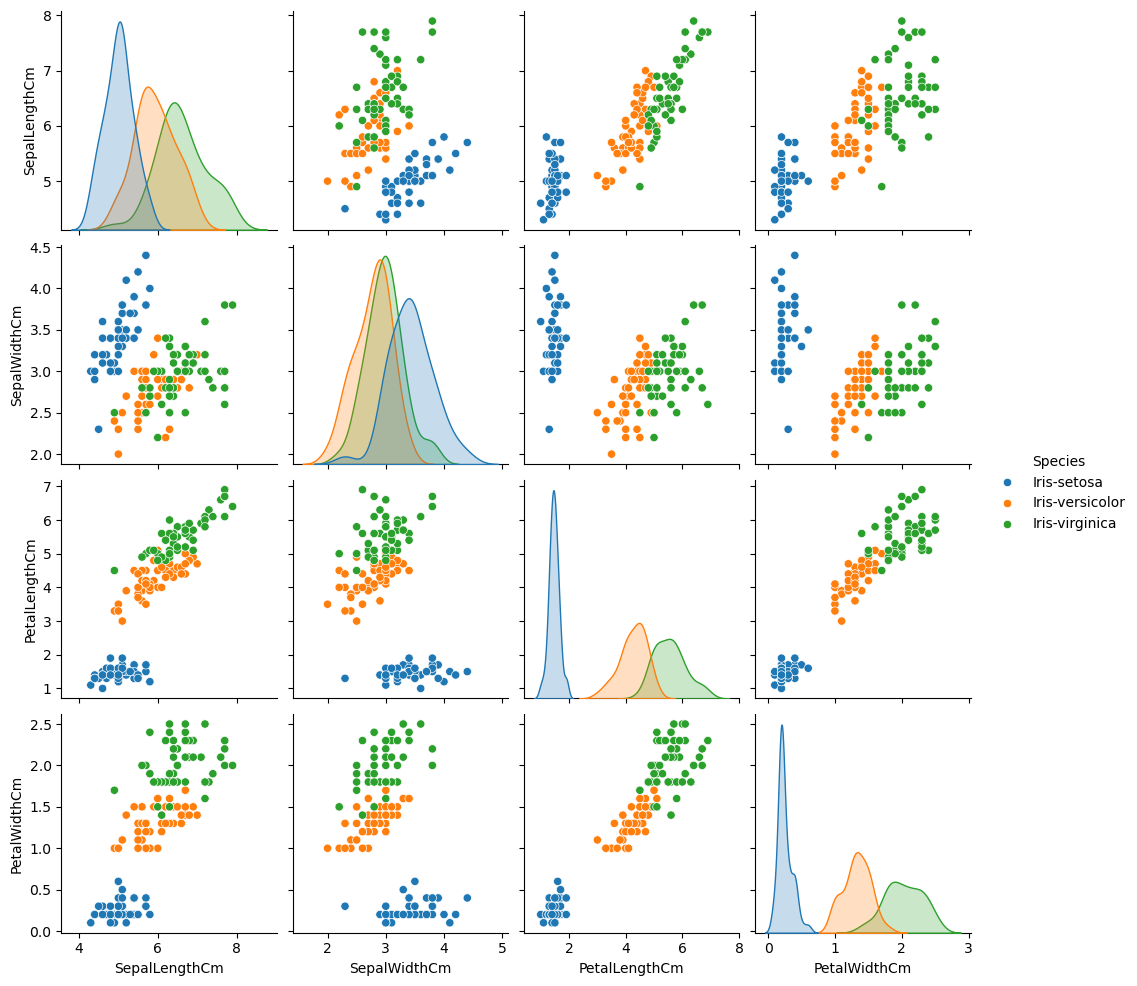

In [ ]:
# Plot interactions and distiributions of features
sns.pairplot(data=iris, hue="Species")
plt.show()

🔍 Exploratory Data Analysis: Pairplot

This pairplot shows pairwise relationships among the four numerical features in the Iris dataset (SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm), color-coded by species (setosa, versicolor, virginica).

🧠 Key Observations:

* Clear separation of Iris-setosa:

    * Iris-setosa (blue) forms a distinct cluster, particularly in plots involving petal length and petal width. This suggests that these features are highly predictive for distinguishing setosa from the other two classes.

* Versicolor vs Virginica overlap:

    * Iris-versicolor (orange) and Iris-virginica (green) show some overlap in most features, especially in sepal features. However, petal dimensions still show relatively good class separation.

* Strong feature correlation:

    * PetalLengthCm and PetalWidthCm exhibit a strong positive correlation across all species. This may suggest redundancy or an opportunity to reduce dimensionality via techniques like PCA (if needed).

* Distribution insights:

    * Diagonal plots show KDEs for individual features by species. We can see the following:

        * Petal measurements have the most distinct distributions across species.

        * Sepal width has more overlapping distributions.

🧪 Implications for Modeling:

* Petal length and width are expected to be the most informative features.

* Dimensionality reduction may be unnecessary due to the low number of features and clear visual separability.

* Since classes are relatively well-separated (especially setosa), even linear classifiers like Logistic Regression may perform well.

* Some misclassifications between versicolor and virginica can be expected due to their overlap.

### **4. Preprocess Data**

#### **4.1 Train-Test Split before transformation** 

In [10]:
# Split data into train-test sets
X = iris.drop("Species", axis=1)
y = iris["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# First few rows of train features
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
47,4.6,3.2,1.4,0.2
121,5.6,2.8,4.9,2.0
27,5.2,3.5,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# First few rows of train labels
y_train.head()

137    Iris-virginica
47        Iris-setosa
121    Iris-virginica
27        Iris-setosa
4         Iris-setosa
Name: Species, dtype: object

#### **4.2 Apply Label Encoder**

In [13]:
# Instantiate label encoder
label_enc = LabelEncoder()

# Transform train and test labels
y_train_enc = label_enc.fit_transform(y_train)
y_test_enc = label_enc.transform(y_test)

# Save label encoder
joblib.dump(label_enc, "label_encoder.joblib")

['label_encoder.joblib']

#### **4.3 Build Preprocessing Pipeline** 


In [14]:
# Create pipeline to scale features
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

### **5. Classification Models**

#### **5.1 Dictionary of Models**

In [ ]:
# Create baseline models
models = {
    "LogisticReg": LogisticRegression(random_state=42),
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(random_state=42)
}

# Create empty dictionary to hold pipelines
pipelines = {}

# Set pipeline for each base model
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

#### **5.2 Cross-Validation on Train**

> Evaluate each model's performance using cross-validation on the training data. This is more reliable because it breaks the data across multiple folds to compare mean performance.

In [ ]:
# Create empty dictionary to hold scores
cv_scores = {}

# Perform cross validation on base models and score
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline,
                             X_train, 
                             y_train,
                             cv=5,
                             scoring="accuracy")
    print(f"\n===================={name}====================\nMean CV Accuracy = {scores.mean():.4f} \nStdev = {scores.std():.4f}")


====================LogisticReg====================
Mean CV Accuracy = 0.9572 
Stdev = 0.0275

====================K Nearest Neighbors====================
Mean CV Accuracy = 0.9395 
Stdev = 0.0652

====================Support Vector Machine====================
Mean CV Accuracy = 0.9743 
Stdev = 0.0210


#### **5.3 Select Best Model**

To compare initial performance, we trained and evaluated three baseline models using 5-fold cross-validation. Below are the mean accuracies and standard deviations across folds:

* Logistic Regression

    * Mean CV Accuracy: 95.72%

    * Standard Deviation: 0.0275

Performs well with low variance, indicating stable performance across folds.

* K Nearest Neighbors (KNN)

    * Mean CV Accuracy: 93.95%

    * Standard Deviation: 0.0652

Slightly lower accuracy and higher variance, suggesting sensitivity to the training data and potential instability. May benefit from tuning n_neighbors.

* Support Vector Machine (SVM)

    * Mean CV Accuracy: 97.43%

    * Standard Deviation: 0.0210

Highest accuracy and lowest variance among all models, indicating both strong and consistent performance.

📌 Conclusion:
SVM outperforms the other models in terms of both accuracy and stability, making it a strong candidate for further tuning and final evaluation. We will proceed with hyperparameter tuning on SVM.

#### **5.4 Hyperparameter Tuning**

In [17]:
# Define hyperparameter choices for SVC model
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],        # Regularization strength
    'classifier__kernel': ['linear', 'rbf'],   # Kernel type
    'classifier__gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf'
}
# Apply GridSearch to identify best hyperparameters
svc_grid = GridSearchCV(
    estimator=pipelines["Support Vector Machine"],
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

# Fit on training data
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler())])),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [18]:
print("Best Parameters:", svc_grid.best_params_)
print()
print("Best CV Score:", svc_grid.best_score_)

Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

Best CV Score: 0.9742753623188406


#### **5.5 Assess Bias/Variance Tradeoff**

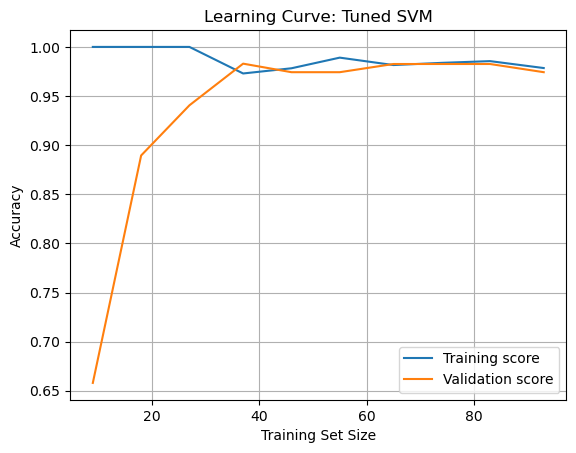

In [19]:
train_sizes, train_scores, val_scores = learning_curve(
    svc_grid.best_estimator_,
    X_train, 
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Tuned SVM')
plt.legend()
plt.grid(True)
plt.show()

📊 Learning Curve Analysis: Tuned Support Vector Machine (SVM)

* The learning curve demonstrates that the tuned SVM model generalizes well across different training set sizes.

    * The validation accuracy starts around 65% with very small training sets, but quickly improves as more data is added.

    * The training accuracy remains consistently high across all training sizes, indicating that the model learns the training data effectively.

    * As the training set grows, both curves plateau and converge around 97%, suggesting that the model is neither underfitting nor overfitting.


#### **5.6 Evaluate Final Model on Test Set**

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set using the best estimator from GridSearchCV
y_pred = svc_grid.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Test Accuracy: 0.9667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


#### **6.1 Save Final Pipeline**

In [21]:
# Save the best estimator (pipeline) from GridSearchCV to a file
joblib.dump(svc_grid.best_estimator_, "iris_svm_pipeline.joblib")
print("Model saved as iris_svm_pipeline.joblib")

Model saved as iris_svm_pipeline.joblib


#### **6.2 Document Model Details**

In [22]:
# Collect model details
model_details = {
    "model_type": type(svc_grid.best_estimator_.named_steps['classifier']).__name__,
    "best_params": svc_grid.best_params_,
    "best_cv_score": svc_grid.best_score_,
    "test_accuracy": test_accuracy,
    "preprocessing": [step[0] for step in svc_grid.best_estimator_.steps if step[0] != 'classifier'],
    "target_classes": list(label_enc.classes_)
}

# Save details to a JSON file
with open("iris_svm_model_details.json", "w") as f:
    json.dump(model_details, f, indent=4)

print("Model details saved to iris_svm_model_details.json")

Model details saved to iris_svm_model_details.json
